## Imports

In [1]:
#@title Loading helpful packages

import numpy as np     
import pandas as pd

## Visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1
### Data Cleaning and Pre-processing

In [2]:
data_file_path = 'Jan-24 project.csv'

# loading data as pandas dataframe
df = pd.read_csv(data_file_path)

In [3]:
#@title Look at data
pd.DataFrame(df)

,product_id,product_title,category,product_subcategory,brand,selling_price,original_price,product_type,product_rating,product_description,availability_status,customer_reviews_count,seasonal_indicator,promotion_indicator,shipping_weight,bundle_indicator,customer_demographics
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,In Stock,7,Spring,Yes,0.658145,Individual,Female
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",In Stock,54,Winter,No,4.734585,Bundle,Female
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",In Stock,31,Winter,No,2.024140,Bundle,Female
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,In Stock,49,Spring,No,3.869239,Individual,Other
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,In Stock,74,Winter,Yes,0.812489,Individual,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...,In Stock,75,Autumn,Yes,1.992988,Bundle,Other
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...,In Stock,65,Autumn,No,2.893314,Bundle,Female
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...,In Stock,61,Autumn,Yes,3.644294,Individual,Female
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori...",In Stock,7,Summer,No,4.540101,Individual,Other


In [4]:
#@title Concise Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_id              27555 non-null  int64  
 1   product_title           27554 non-null  object 
 2   category                27555 non-null  object 
 3   product_subcategory     27555 non-null  object 
 4   brand                   27554 non-null  object 
 5   selling_price           27555 non-null  float64
 6   original_price          27555 non-null  float64
 7   product_type            27555 non-null  object 
 8   product_rating          18929 non-null  float64
 9   product_description     27440 non-null  object 
 10  availability_status     27555 non-null  object 
 11  customer_reviews_count  27555 non-null  int64  
 12  seasonal_indicator      27555 non-null  object 
 13  promotion_indicator     27555 non-null  object 
 14  shipping_weight         27555 non-null

In [5]:
#@title Check for missing values
print(df.isnull().sum())

product_id                   0
product_title                1
category                     0
product_subcategory          0
brand                        1
selling_price                0
original_price               0
product_type                 0
product_rating            8626
product_description        115
availability_status          0
customer_reviews_count       0
seasonal_indicator           0
promotion_indicator          0
shipping_weight              0
bundle_indicator             0
customer_demographics        0
dtype: int64


In [6]:
df['product_title'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
27550    False
27551     True
27552    False
27553    False
27554     True
Name: product_title, Length: 27555, dtype: bool

In [7]:
#@title Check for unique values
for col in df.columns:
    print(f"Feature: {col}, DType: {df[col].dtype}")
    print(f"# of unique values = {df[col].nunique()}")
    print("")

Feature: product_id, DType: int64
# of unique values = 27555

Feature: product_title, DType: object
# of unique values = 23540

Feature: category, DType: object
# of unique values = 11

Feature: product_subcategory, DType: object
# of unique values = 90

Feature: brand, DType: object
# of unique values = 2313

Feature: selling_price, DType: float64
# of unique values = 3256

Feature: original_price, DType: float64
# of unique values = 1348

Feature: product_type, DType: object
# of unique values = 426

Feature: product_rating, DType: float64
# of unique values = 40

Feature: product_description, DType: object
# of unique values = 21944

Feature: availability_status, DType: object
# of unique values = 1

Feature: customer_reviews_count, DType: int64
# of unique values = 101

Feature: seasonal_indicator, DType: object
# of unique values = 4

Feature: promotion_indicator, DType: object
# of unique values = 2

Feature: shipping_weight, DType: float64
# of unique values = 27555

Feature: bu

### Identify redundant columns/features

#### No uniqueness
- `availability_status` → **redundant feature**
    > `In Stock` is the only one unique value for all entries

\

#### Data having large number of unique values


- `product_id` → **redundant feature**

    - sequential values

\

#### Modify features based on  some `threshold` value

- `product_type`
    > unique product types → $460$

    > [`count < threshold`] → new product type → `other`
- `brand`
    > unique brands →
$2313$

    > less popular brands → `local_brand`

    > Add new feature dividing `brand` into `brand_scale`
    - low
    - mid
    - high

In [8]:
#@title `product_types` having `# products < threshold`
threshold = 10
print(f"Condition: \ncount < {threshold}")
print("\nCount out of 426")
print((df['product_type'].value_counts() < threshold).value_counts())
print("\n\nPercentage")
print(round((df['product_type'].value_counts() < threshold).value_counts()/4.26))

Condition: 
count < 10

Count out of 426
count
False    353
True      73
Name: count, dtype: int64


Percentage
count
False    83.0
True     17.0
Name: count, dtype: float64


In [9]:
#@title Unique Value counts - `brand`
for col in ['brand']:
    print()
    print(f"Feature: {col}")
    print()
    print(f"{df[col].value_counts()}")


Feature: brand

brand
Fresho              638
bb Royal            539
BB Home             428
DP                  250
Fresho Signature    171
                   ... 
Wellastrate           1
Clean & Fresh         1
Lal                   1
Glint                 1
Baron De Bercy        1
Name: count, Length: 2313, dtype: int64


In [10]:
#@title `brand` having `products < threshold`
threshold = 120
print(f"Condition: \ncount < {threshold}")
print("\nCount out of 2313")
print((df['brand'].value_counts() < threshold).value_counts())
print("\n\nPercentage")
print(round((df['brand'].value_counts() < threshold).value_counts()/23.13))

Condition: 
count < 120

Count out of 2313
count
True     2300
False      13
Name: count, dtype: int64


Percentage
count
True     99.0
False     1.0
Name: count, dtype: float64


In [13]:
#@title **try plotting box plot**
## reduce brands to some extent
# reduced_brands_df = df()
# df.boxplot(by ='brand', column =['product_id'], grid = False)

#### Try grouping products by features

such as `category`, `product_subcategory`, `brand`

In [11]:
#@title Unique Value counts - `category`
for col in ['category']:
    print()
    print(f"Feature: {col}")
    print()
    print(f"{df[col].value_counts()}")


Feature: category

category
Beauty & Hygiene            7867
Gourmet & World Food        4690
Kitchen, Garden & Pets      3580
Snacks & Branded Foods      2814
Foodgrains, Oil & Masala    2676
Cleaning & Household        2675
Beverages                    885
Bakery, Cakes & Dairy        851
Baby Care                    610
Fruits & Vegetables          557
Eggs, Meat & Fish            350
Name: count, dtype: int64


In [12]:
#@title close look at `category` w.r.t `product_subcategory`

## This is tried for sake of understanding
## So as to check the possibility to group some of product_subcategory

sum = 0
for name, group in df.groupby("category"):

    total_product_count_in_category = group.shape[0]

    table1 = group['product_subcategory'].value_counts()
    # print(table1)
    # break

    count = len(table1)
    sum += count

    print("category :", name)
    print(f"# sub_categories =", count)
    print(f"# products =", group.shape[0])
    print()

    # try different values (1%, 2%, 3.5%, 5%)
    threshold = 0.035 * total_product_count_in_category
    table2 = (table1 < threshold).value_counts()

    print(f"product_subcategory with less than {round(threshold)} products")
    # print(table2.unique())
    print(table2)
    print()
    print()

print("Total subcategories =",sum)
print("Total products =", df.shape[0])

category : Baby Care
# sub_categories = 7
# products = 610

product_subcategory with less than 21 products
count
False    6
True     1
Name: count, dtype: int64


category : Bakery, Cakes & Dairy
# sub_categories = 8
# products = 851

product_subcategory with less than 30 products
count
False    7
True     1
Name: count, dtype: int64


category : Beauty & Hygiene
# sub_categories = 10
# products = 7867

product_subcategory with less than 275 products
count
False    7
True     3
Name: count, dtype: int64


category : Beverages
# sub_categories = 6
# products = 885

product_subcategory with less than 31 products
count
False    5
True     1
Name: count, dtype: int64


category : Cleaning & Household
# sub_categories = 10
# products = 2675

product_subcategory with less than 94 products
count
False    8
True     2
Name: count, dtype: int64


category : Eggs, Meat & Fish
# sub_categories = 6
# products = 350

product_subcategory with less than 12 products
count
False    4
True     2
Name: c

In [14]:
#@title close look at `category` w.r.t `brand`

## This is tried for sake of understanding
## So as to check the possibility to group some of brand

sum = 0
for name, group in df.groupby("category"):

    total_product_count_in_category = group.shape[0]

    table1 = group['brand'].value_counts()
    # print(table1)
    # break

    count = len(table1)
    sum += count

    print("category :", name)
    print(f"# brands =", count)
    print(f"# products =", group.shape[0])
    print()

    # try different values (1%, 2%, 3.5%, 5%)
    threshold = 0.035 * total_product_count_in_category
    table2 = (table1 < threshold).value_counts()

    print(f"brand with less than {round(threshold)} products")
    # print(table2.unique())
    print(table2)
    print()
    print()

print("Total # brands =",sum)
print("Total # products =", df.shape[0])

category : Baby Care
# brands = 65
# products = 610

brand with less than 21 products
count
True     54
False    11
Name: count, dtype: int64


category : Bakery, Cakes & Dairy
# brands = 85
# products = 851

brand with less than 30 products
count
True     79
False     6
Name: count, dtype: int64


category : Beauty & Hygiene
# brands = 644
# products = 7867

brand with less than 275 products
count
True    644
Name: count, dtype: int64


category : Beverages
# brands = 171
# products = 885

brand with less than 31 products
count
True     168
False      3
Name: count, dtype: int64


category : Cleaning & Household
# brands = 391
# products = 2675

brand with less than 94 products
count
True     390
False      1
Name: count, dtype: int64


category : Eggs, Meat & Fish
# brands = 44
# products = 350

brand with less than 12 products
count
True     37
False     7
Name: count, dtype: int64


category : Foodgrains, Oil & Masala
# brands = 235
# products = 2676

brand with less than 94 produc

## Pre-processing Data

In [15]:
#@title Remove redundancy

## redundant columns/features ->
data = df.drop(columns = ['product_id', 'availability_status'])

In [16]:
# delete rows with missing values in brand and product_title
data = data.dropna(subset=['brand', 'product_title'])

In [17]:
data['product_rating'] = data.groupby('brand')['product_rating'].transform(lambda x: x.fillna(x.median()))

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.n

In [18]:
# fill the remaining missing values with median of category
data['product_rating'] = data.groupby('category')['product_rating'].transform(lambda x: x.fillna(x.median()))

OptionError: No such keys(s): 'mode.use_inf_as_null'

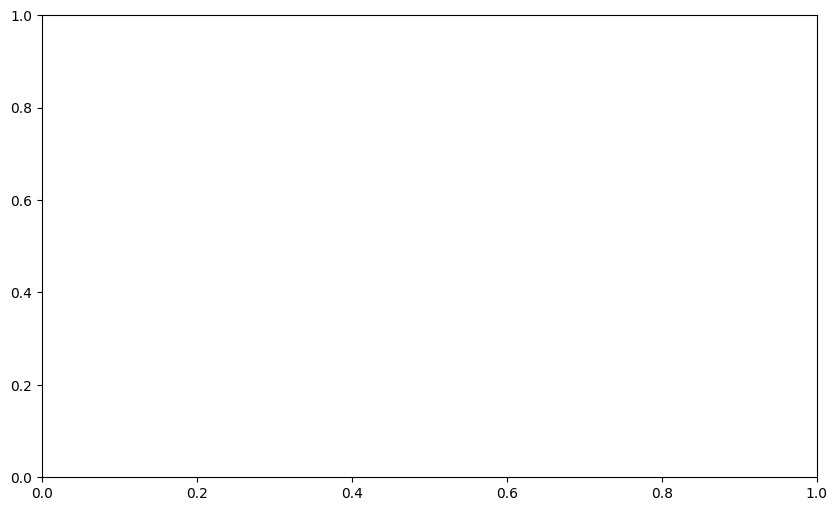

In [21]:
# plot the distribution of product_rating from data and df
plt.figure(figsize=(10, 6))
sns.histplot(data['product_rating'], kde=True, color='blue', label='Imputed Data')
sns.histplot(df['product_rating'], kde=True, color='red', label='Actual Data')
plt.title('Distribution of Product Rating')
plt.legend()
plt.show()


In [19]:
data['discount_offered'] = 100 * (data['original_price'] - data['selling_price'])/data['original_price']
data['discount_offered'] = data['discount_offered'].round(2)

In [20]:
# calculate brand count
brand_count = data['brand'].value_counts()
brand_count = brand_count.reset_index()
brand_count.columns = ['brand', 'count']

# plot box plot using plotly
import plotly.express as px
fig = px.box(brand_count, y='count', title='Brand Count Distribution')
fig.show()


# count the number of brands having count less than 120
brand_count_less_than_12 = brand_count[brand_count['count'] < 12]
print(f"# of brands having count less than 12 = {brand_count_less_than_12.shape[0]}")
brand_count_less_than_110 = brand_count[(brand_count['count'] < 110) & (brand_count['count'] >= 12 )]
print(f"# of brands having count less than 110 = {brand_count_less_than_110.shape[0]}")
brand_count_gret_than_110 = brand_count[brand_count['count'] > 110]
print(f"# of brands having count greater than 110 = {brand_count_gret_than_110.shape[0]}")



# of brands having count less than 12 = 1709
# of brands having count less than 110 = 589
# of brands having count greater than 110 = 15


In [21]:
# map these brand_count to each brand in the data in new column brand_count
data = data.merge(brand_count, on='brand', how='left')

In [22]:
# create a new column brand_scale based on the count column, if the count is less than 12 then the value will be 'low', elif the count is greater than 12 and less than 110 then the value will be 'medium' else 'high'
data['brand_scale'] = data['count'].apply(lambda x: 'low' if x < 12 else 'medium' if (x < 110 and x >= 12) else 'high')
data['brand_scale'].value_counts()
brand_group = data.groupby(['brand_scale', 'brand']).size().reset_index(name='count')
brand_group


,brand_scale,brand,count
0,high,Amul,153
1,high,BB Home,428
2,high,BIOTIQUE,117
3,high,Cello,124
4,high,DP,250
...,...,...,...
2308,medium,Yummiez,34
2309,medium,bb Popular,65
2310,medium,kwality walls,16
2311,medium,mother dairy,13


In [23]:
# Cross check
brand_high = brand_group[brand_group['brand_scale'] == 'medium']
brand_high.shape
data = data.drop(columns='count')

In [24]:
data.head()

,product_title,category,product_subcategory,brand,selling_price,original_price,product_type,product_rating,product_description,customer_reviews_count,seasonal_indicator,promotion_indicator,shipping_weight,bundle_indicator,customer_demographics,discount_offered,brand_scale
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,7,Spring,Yes,0.658145,Individual,Female,0.00,medium
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",54,Winter,No,4.734585,Bundle,Female,0.00,medium
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",31,Winter,No,2.024140,Bundle,Female,52.40,medium
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,49,Spring,No,3.869239,Individual,Other,15.34,medium
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,74,Winter,Yes,0.812489,Individual,Male,0.00,medium


In [ ]:
# data.to_csv('data.csv', index=False)

## Analysis

In [25]:
data = pd.read_csv('data.csv')  
data.head()

,product_title,category,product_subcategory,brand,selling_price,original_price,product_type,product_rating,product_description,customer_reviews_count,seasonal_indicator,promotion_indicator,shipping_weight,bundle_indicator,customer_demographics,discount_offered,brand_scale
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,7,Spring,Yes,0.658145,Individual,Female,0.00,medium
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",54,Winter,No,4.734585,Bundle,Female,0.00,medium
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",31,Winter,No,2.024140,Bundle,Female,52.40,medium
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,49,Spring,No,3.869239,Individual,Other,15.34,medium
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,74,Winter,Yes,0.812489,Individual,Male,0.00,medium


In [26]:
data.describe()

,selling_price,original_price,product_rating,customer_reviews_count,shipping_weight,discount_offered
count,27553.000000,27553.000000,27553.000000,27553.000000,27553.000000,27553.000000
mean,322.529145,382.073872,3.963815,49.962363,2.742126,11.825113
std,486.277432,581.747762,0.671158,29.016464,1.298890,14.624822
min,2.450000,3.000000,1.000000,0.000000,0.500019,0.000000
25%,95.000000,100.000000,3.800000,25.000000,1.622328,0.000000
50%,190.000000,220.000000,4.100000,50.000000,2.731628,5.000000
75%,359.000000,425.000000,4.300000,75.000000,3.871115,20.000000
max,12500.000000,12500.000000,5.000000,100.000000,4.999455,83.670000


In [ ]:
from ydata_profiling import ProfileReport
import pandas as pd

# Generate the profile report
profile = ProfileReport(data, title='Data Profiling Report', explorative=True)

# Save the report to a file
profile.to_file("data_profile_report.html")


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ydata_profiling\profile_report.py:354: UserWarning:

Try running command: 'pip install --upgrade Pillow' to avoid ValueError



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning:

The input array could not be properly checked for nan values. nan values will be ignored.

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning:

The input array could not be properly checked for nan values. nan values will be ignored.

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning:

The input array could not be properly checked for nan values. nan values will be ignored.

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarni

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\HP\AppData\Local\Temp\ipykernel_16164\4213394475.py", line 8, in <module>
    profile.to_file("data_profile_report.html")
  File "C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ydata_profiling\profile_report.py", line 370, in to_file
    data = self.to_html()
  File "C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ydata_profiling\profile_report.py", line 487, in to_html
    return self.html
  File "C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\P

In [27]:
data_average_rating = data.groupby(['category'])['product_rating'].mean().reset_index()
data_average_rating['product_rating'] = data_average_rating['product_rating'].round(2)
data_average_rating = data_average_rating.sort_values(by=['product_rating'], ascending=False)
data_average_rating.head(20)

,category,product_rating
3,Beverages,4.07
6,"Foodgrains, Oil & Masala",4.05
0,Baby Care,4.01
8,Gourmet & World Food,4.01
7,Fruits & Vegetables,4.00
4,Cleaning & Household,3.99
10,Snacks & Branded Foods,3.98
1,"Bakery, Cakes & Dairy",3.95
5,"Eggs, Meat & Fish",3.95
2,Beauty & Hygiene,3.94


In [28]:
data_category_sales = data.groupby(['category'])['customer_reviews_count'].sum().reset_index()
data_category_sales = data_category_sales.sort_values(by='customer_reviews_count', ascending=False)
data_category_sales.head(20)

,category,customer_reviews_count
2,Beauty & Hygiene,390805
8,Gourmet & World Food,236487
9,"Kitchen, Garden & Pets",178871
10,Snacks & Branded Foods,140381
4,Cleaning & Household,134910
6,"Foodgrains, Oil & Masala",134474
3,Beverages,43211
1,"Bakery, Cakes & Dairy",41356
0,Baby Care,30988
7,Fruits & Vegetables,27985


In [29]:
top_category = pd.merge(data_average_rating.head(50), data_category_sales.head(50), on=['category'], how='inner')
top_category.head(10)

,category,product_rating,customer_reviews_count
0,Beverages,4.07,43211
1,"Foodgrains, Oil & Masala",4.05,134474
2,Baby Care,4.01,30988
3,Gourmet & World Food,4.01,236487
4,Fruits & Vegetables,4.00,27985
5,Cleaning & Household,3.99,134910
6,Snacks & Branded Foods,3.98,140381
7,"Bakery, Cakes & Dairy",3.95,41356
8,"Eggs, Meat & Fish",3.95,17145
9,Beauty & Hygiene,3.94,390805


In [30]:
data['total_sales'] = data['selling_price'] * data['customer_reviews_count']
category_wise_sales = data.groupby(['category'])['total_sales'].sum().reset_index()
top_category_with_sales = pd.merge(top_category, category_wise_sales, on=['category'], how='inner')
top_category_with_sales = top_category_with_sales.sort_values(by=['product_rating', 'customer_reviews_count', 'total_sales'], ascending=False)
top_category_with_sales.head(5)

,category,product_rating,customer_reviews_count,total_sales
0,Beverages,4.07,43211,10397359.51
1,"Foodgrains, Oil & Masala",4.05,134474,25872054.47
3,Gourmet & World Food,4.01,236487,76176748.11
2,Baby Care,4.01,30988,16223456.13
4,Fruits & Vegetables,4.00,27985,1456307.18


In [31]:
import plotly.express as px

# Create bubble chart
fig = px.scatter(top_category_with_sales.head(5), 
                 x='product_rating', 
                 y='customer_reviews_count', 
                 size='total_sales',  # Size of bubbles determined by total_sales
                 color='product_rating',  # Color of bubbles determined by product_rating
                 hover_data={'category': True,
                             'total_sales': True,
                             'product_rating': True},
                 title='Top Category and Subcategory',
                 labels={'category': 'Category', 
                         'total_sales': 'Total Sales',
                         'product_rating': 'Product Rating'},
                 size_max=30,)  # Adjust maximum bubble size as needed

# Update layout
fig.update_layout(
    xaxis_title='Product Rating',
    yaxis_title='Total Sales'
)

# Show the plot
fig.show()


In [32]:
low_category = pd.merge(data_average_rating.tail(30), data_category_sales.tail(30), on=['category'], how='inner')
low_category.tail(10)

,category,product_rating,customer_reviews_count
1,"Foodgrains, Oil & Masala",4.05,134474
2,Baby Care,4.01,30988
3,Gourmet & World Food,4.01,236487
4,Fruits & Vegetables,4.00,27985
5,Cleaning & Household,3.99,134910
6,Snacks & Branded Foods,3.98,140381
7,"Bakery, Cakes & Dairy",3.95,41356
8,"Eggs, Meat & Fish",3.95,17145
9,Beauty & Hygiene,3.94,390805
10,"Kitchen, Garden & Pets",3.83,178871


In [33]:
low_category_with_sales = pd.merge(low_category, category_wise_sales, on=['category'], how='inner')
low_category_with_sales = low_category_with_sales.sort_values(by=['product_rating', 'customer_reviews_count', 'total_sales'], ascending=False)
low_category_with_sales.tail(6)

,category,product_rating,customer_reviews_count,total_sales
5,Cleaning & Household,3.99,134910,3.010827e+07
6,Snacks & Branded Foods,3.98,140381,1.833145e+07
7,"Bakery, Cakes & Dairy",3.95,41356,6.046531e+06
8,"Eggs, Meat & Fish",3.95,17145,4.879440e+06
9,Beauty & Hygiene,3.94,390805,1.641310e+08
10,"Kitchen, Garden & Pets",3.83,178871,8.994958e+07


In [34]:
import plotly.express as px

# Create bubble chart
fig = px.scatter(low_category_with_sales.tail(5), 
                 x='product_rating', 
                 y='customer_reviews_count', 
                 size='total_sales',  # Size of bubbles determined by total_sales
                 color='product_rating',  # Color of bubbles determined by product_rating
                 hover_data={'category': True,
                             'total_sales': True,
                             'product_rating': True},
                 title='Low Category and Subcategory',
                 labels={'category': 'Category', 
                         'total_sales': 'Total Sales',
                         'product_rating': 'Product Rating'},
                 size_max=30)  # Adjust maximum bubble size as needed

# Update layout
fig.update_layout(
    xaxis_title='Product Rating',
    yaxis_title='Total Sales'
)

# Show the plot
fig.show()


In [35]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# Create scatter plots using Plotly Express
scatter_top = px.scatter(top_category_with_sales.head(5), 
                         x='product_rating', 
                         y='customer_reviews_count', 
                         size='total_sales',  
                         color='product_rating',  
                         hover_data={'category': True,
                                     'total_sales': True,
                                     'product_rating': True},
                         title='Top 5 Categories',
                         labels={'category': 'Category', 
                                 'total_sales': 'Total Sales',
                                 'product_rating': 'Product Rating'},
                         size_max=30)

scatter_low = px.scatter(low_category_with_sales.tail(6), 
                         x='product_rating', 
                         y='customer_reviews_count', 
                         size='total_sales',  
                         color='product_rating',  
                         hover_data={'category': True,
                                     'total_sales': True,
                                     'product_rating': True},
                         title='Lowest 5 Categories',
                         labels={'category': 'Category', 
                                 'total_sales': 'Total Sales',
                                 'product_rating': 'Product Rating'},
                         size_max=30)

# Create subplots with two rows
fig = make_subplots(rows=2, cols=1, subplot_titles=("Top 5 Categories", "Lowest 6 Categories"))

# Add Plotly Express scatter plots to the subplots
fig.add_trace(scatter_top['data'][0], row=1, col=1)
fig.add_trace(scatter_low['data'][0], row=2, col=1)

# Update layout
fig.update_layout(height=800, showlegend=True, xaxis_title='Product Rating',
    yaxis_title='Total Sales')

# Show the plot
fig.show()


In [39]:
import plotly.graph_objects as go

# Sample data for demonstration purposes
top_categories = top_category_with_sales.sort_values(by='customer_reviews_count', ascending=False)['category'].head(5)
top_average_rating = top_category_with_sales.sort_values(by='customer_reviews_count', ascending=False)['product_rating'].head(5)
top_sales = top_category_with_sales.sort_values(by='customer_reviews_count', ascending=False)['customer_reviews_count'].head(5)
top_revenue = top_category_with_sales.sort_values(by='customer_reviews_count', ascending=False)['total_sales'].head(5)

low_categories = low_category_with_sales.sort_values(by='customer_reviews_count', ascending=False)['category'].tail(6)
low_average_rating = low_category_with_sales.sort_values(by='customer_reviews_count', ascending=False)['product_rating'].tail(6)
low_sales = low_category_with_sales.sort_values(by='customer_reviews_count', ascending=False)['customer_reviews_count'].tail(6)
low_revenue = low_category_with_sales.sort_values(by='customer_reviews_count', ascending=False)['total_sales'].tail(6)

# Calculate the maximum value of average rating
max_average_rating = max(max(top_average_rating), max(low_average_rating))

max_total_sales = max(max(top_sales), max(low_sales))

# Rescale average rating values to be more visible on the chart
scaled_top_average_rating = [rating * max_total_sales / max_average_rating for rating in top_average_rating]
scaled_low_average_rating = [rating * max_total_sales / max_average_rating for rating in low_average_rating]

# Create trace for top categories
trace_top = go.Bar(
    x=top_sales,
    y=top_categories,
    orientation='h',
    name='Top Categories',
    text=top_sales,  # Labels for top categories
    textposition='auto',  # Position labels automatically
    marker=dict(color='rgba(50, 171, 96, 0.6)')  # Green color for top categories
)

# Create trace for low categories
trace_low = go.Bar(
    x=low_sales,
    y=low_categories,
    orientation='h',
    name='Low Categories',
    text=low_sales,  # Labels for low categories
    textposition='auto',  # Position labels automatically
    marker=dict(color='rgba(219, 64, 82, 0.6)')  # Red color for low categories
)

# Create layout
layout = go.Layout(
    title='Top and Low Categories Based on Sales',
    barmode='group',  # Group bars side by side
    xaxis=dict(title='Total Sales'),  # X-axis title
    yaxis=dict(title='Category'),  # Y-axis title
    showlegend=True,  # Show legend
    height=600,  # Adjust height of the chart
    margin=dict(l=150)  # Adjust left margin for longer category names
)

# Create figure
fig = go.Figure(data=[trace_top, trace_low], layout=layout)

# Show the chart
fig.show()
